# **Quantum Algorithms**

## **Deutsch Algorithm**

##### *Implementation*

Installation of necessary packages

In [ ]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installation and importing of libraries

In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

First, we create a circuit with 2 qubits and 1 bit for measurement.

In [ ]:
circuit = QuantumCircuit(2,1)

Then, we apply the h on the 1st qubit and the x and h on the 2nd qubit and finally a barrier.

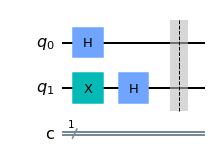

In [ ]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

After, we add cnot, then a barrier and later a h.

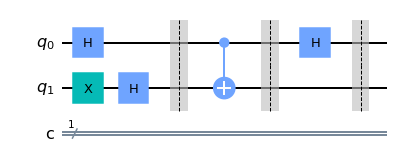

In [ ]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

Here, we measure the qubit

In [ ]:
circuit.measure(0,0)

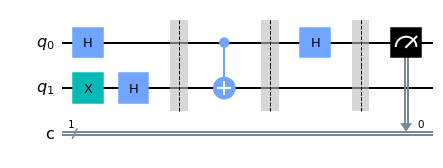

In [ ]:
circuit.draw(output='mpl')

Here, we create a connection with the back-end in order to run it in a simulator.

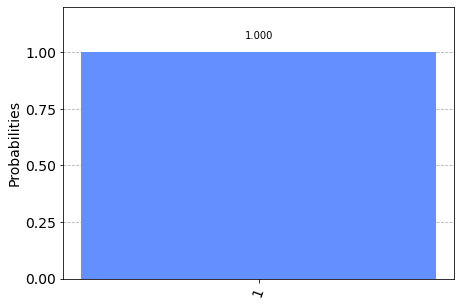

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

We managed to find out that this is a balanced function and it only took 1 shot.

Here, we will run it in a real quantum computer.

First, we save the API given from https://quantum-computing.ibm.com/ at a txt file and then we import it.

In [ ]:
IBMQ.save_account(open("ibmapi.txt","r").read())

configrc.store_credentials:WARNING:2022-09-19 18:59:31,843: Credentials already present. Set overwrite=True to overwrite.


Then, we load the account

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Now, get the providers and the available back-ends

In [ ]:
provider = IBMQ.get_provider("ibm-q")

In [ ]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 1 & simulated qubits
ibmq_lima : 507 & 5 qubits
ibmq_belem : 93 & 5 qubits
ibmq_quito : 104 & 5 qubits
simulator_statevector : 1 & simulated qubits
simulator_mps : 1 & simulated qubits
simulator_extended_stabilizer : 1 & simulated qubits
simulator_stabilizer : 2 & simulated qubits
ibmq_manila : 110 & 5 qubits
ibm_nairobi : 101 & 7 qubits
ibm_oslo : 304 & 7 qubits


We choose the least busy one.

In [ ]:
quantum_computer = provider.get_backend('ibmq_belem')

And we add a job monitor and we wait it to be executed.

In [ ]:
import qiskit.tools.jupyter
%qiskit_job_watcher

job = execute(circuit,backend=quantum_computer)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


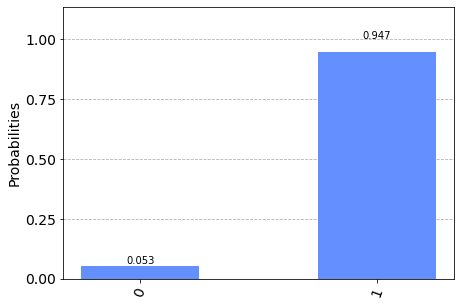

In [ ]:
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

We can see that there is noise but the result is clear.

In [ ]:
%qiskit_disable_job_watcher